In [132]:
import os
import numpy as np
import pickle as pk
from scipy.io import wavfile
import scipy.signal as signal
import matplotlib.pyplot as plt
import math

In [2]:
knn = pk.load(open("knn_classifier.pkl", "rb"))
pca = pk.load(open("pca.pkl", "rb"))

In [160]:
# rate, audio = wavfile.read("./music/Guitar/818.wav")
rate, audio = wavfile.read("13.wav")
audio = np.array(audio, dtype=float)
frequencies, times, spectrogram = signal.stft(audio, rate)

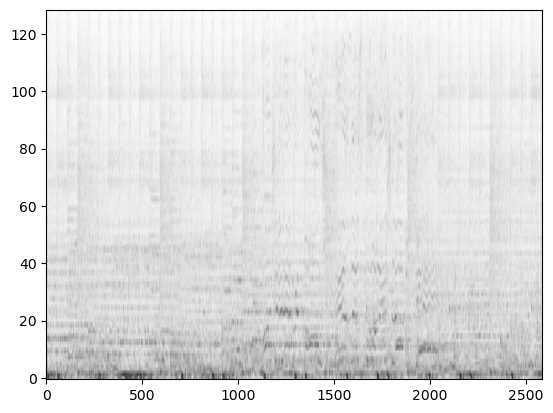

In [161]:
plt.imshow(np.sqrt(np.abs(spectrogram)), aspect = 'auto', origin = 'lower', cmap = 'gist_yarg')
plt.show()

In [162]:
rms = math.sqrt(np.mean(audio ** 2))
for i in range(1500, 2000):
    spectrogram[:, i] += np.random.normal(0, np.sqrt(rms) * 2, spectrogram.shape[0])

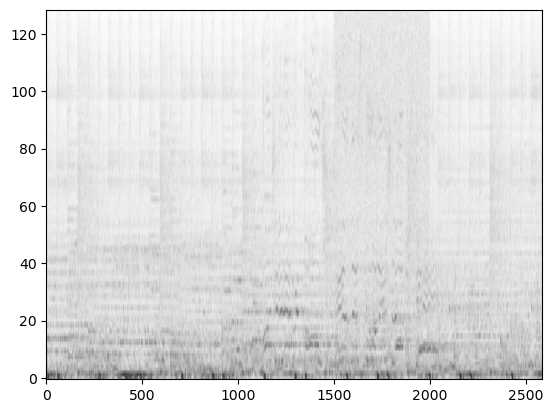

In [163]:
plt.imshow(np.sqrt(np.abs(spectrogram)), aspect = 'auto', origin = 'lower', cmap = 'gist_yarg')
plt.savefig("noisy.png")

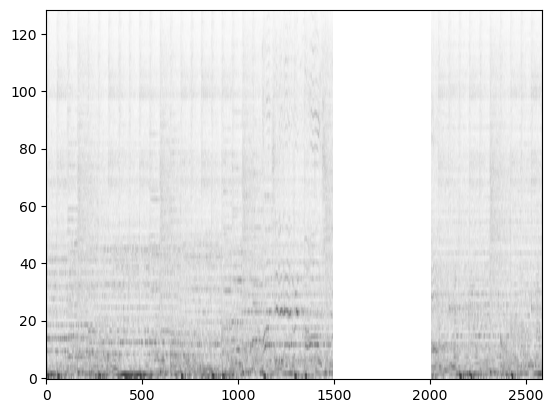

In [164]:
hole = [1 for _ in range(spectrogram.shape[1])]
for i in range(1500, 2000):
    hole[i] = np.nan
new_spectrogram = spectrogram * hole
plt.imshow(np.sqrt(np.abs(new_spectrogram)), aspect = 'auto', origin = 'lower', cmap = 'gist_yarg')
plt.savefig("removed.png")

In [91]:
def spectogram_nmf(spectogram, num_iter = 100):
  X = spectogram.copy()

  m, n = X.shape
  rank = 100
  W = np.random.rand(X.shape[0], rank)
  H = np.random.rand(rank, X.shape[1])

  for _ in range(num_iter):
    H = H * (W.T.dot(X) / (W.T.dot(W).dot(H) + 1e-6))
    W = W * (X.dot(H.T) / (W.dot(H).dot(H.T) + 1e-6))

  return W, H

In [165]:
from sklearn.impute import KNNImputer

In [166]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [167]:
y = imputer.fit_transform(np.abs(new_spectrogram))

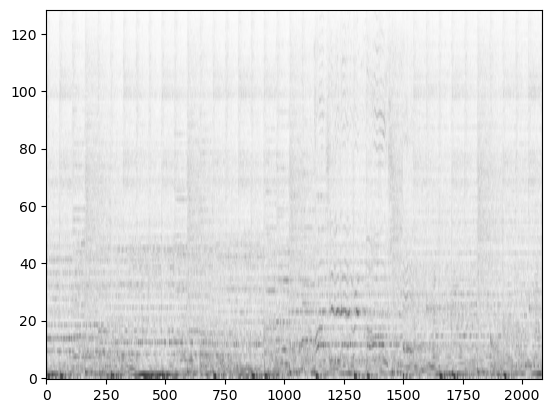

In [168]:
plt.imshow(np.sqrt(np.abs(y)), aspect = 'auto', origin = 'lower', cmap = 'gist_yarg')
plt.savefig("imputed.png")